<a href="https://colab.research.google.com/github/ricardorocha86/Topicos-A/blob/main/T%C3%B3picos_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais

In [3]:
# Carregando dados
dados = read.csv('anuncios.csv')
dados[, 3:4] = scale(dados[,3:4])
dados['Gender'] = ifelse(dados['Gender'] == 'Male', 1, 0)
dados = dados[, 2:5]
head(dados)

,Gender,Age,EstimatedSalary,Purchased
,"<dbl[,1]>",<dbl>,<dbl>,<int>
1,1,-1.7795688,-1.4881825,0
2,1,-0.2532702,-1.4588544,0
3,0,-1.1118131,-0.7843075,0
4,0,-1.0164195,-0.3737137,0
5,1,-1.7795688,0.1835208,0
6,1,-1.0164195,-0.3443855,0


In [ ]:
# Pacote 'caret'
install.packages('caret')
install.packages('e1071')

In [8]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [9]:
# Dividindo em teste e treinamento
indice = createDataPartition(y = dados[['Purchased']], p = 7/8, list = FALSE)
treino = dados[ indice, ]
teste  = dados[-indice, ] 

In [10]:
# Controle do Treinamento
controle <- trainControl(method = "repeatedcv", number = 10, repeats = 3) 

In [ ]:
# Rede Neural 
metodo = 'nnet'

modelLookup(model = metodo)
modelo = train(factor(Purchased) ~., data = treino, method = metodo,
               trControl = controle, tuneLength = 5 )
modelo$resample
modelo

In [14]:
# Resultado da predição
predicao = predict(modelo, newdata = teste)
cm = confusionMatrix(predicao, factor(teste[['Purchased']]) )
cm


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 32  4
         1  2 12
                                          
               Accuracy : 0.88            
                 95% CI : (0.7569, 0.9547)
    No Information Rate : 0.68            
    P-Value [Acc > NIR] : 0.0009925       
                                          
                  Kappa : 0.7148          
                                          
 Mcnemar's Test P-Value : 0.6830914       
                                          
            Sensitivity : 0.9412          
            Specificity : 0.7500          
         Pos Pred Value : 0.8889          
         Neg Pred Value : 0.8571          
             Prevalence : 0.6800          
         Detection Rate : 0.6400          
   Detection Prevalence : 0.7200          
      Balanced Accuracy : 0.8456          
                                          
       'Positive' Class : 0               
                                    

In [ ]:
# Grafico da Rede

install.packages('NeuralNetTools')  

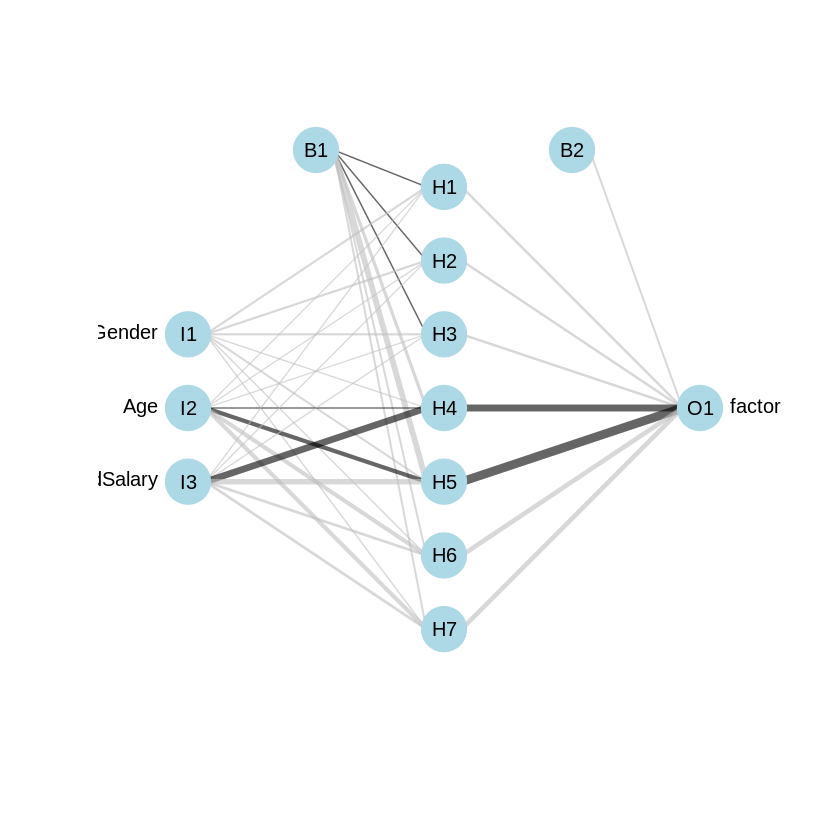

In [16]:
library(NeuralNetTools)  
plotnet(modelo, alpha = 0.6)

In [ ]:
# Regiao de Decisão
# Gráfico de Região
malha = 200 
treino0 = treino[2:4]
teste0 = teste[2:4]
X1 = seq( min(teste0[, 1]), max(teste0[, 1]), length.out = malha)
X2 = seq( min(teste0[, 2]), max(teste0[, 2]), length.out = malha)
grid = expand.grid(X1, X2)
colnames(grid) = colnames(treino0[, 1:2])

metodo = 'nnet'
modelLookup(model = metodo)
modelo = train(factor(Purchased) ~., data = treino0, method = metodo,
               trControl = controle, tuneLength = 4 )
y_grid = predict(modelo, newdata = grid)



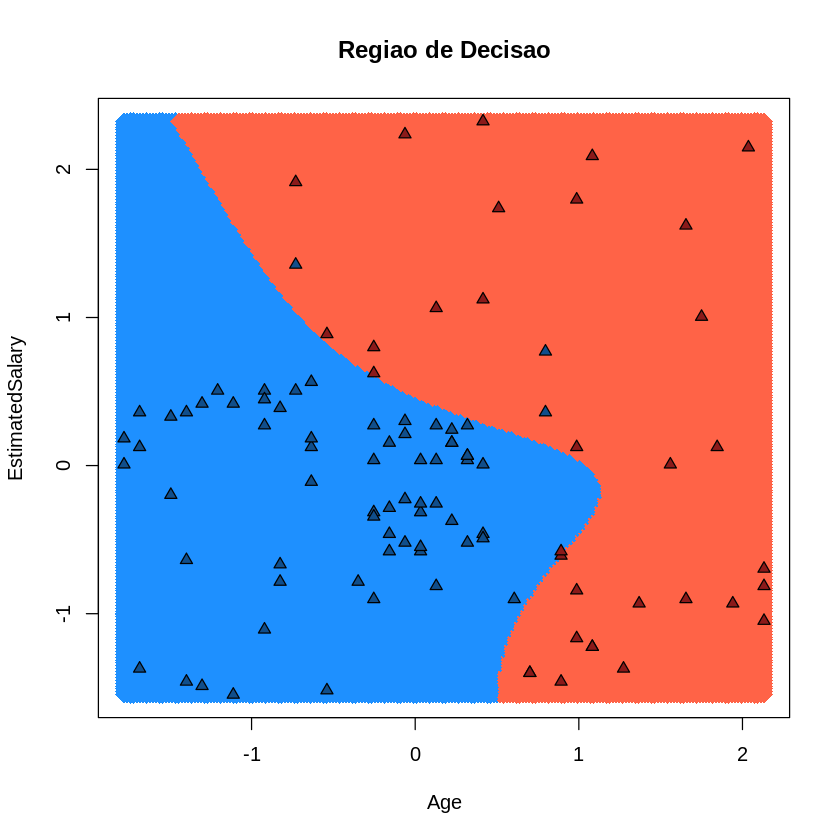

In [33]:
plot(teste0[, -3], main = 'Regiao de Decisao')
points(grid, pch = 18, col = ifelse(y_grid == 1, 'tomato', 'dodgerblue1'), cex= 2 )
points(teste0, pch = 24, bg = ifelse(teste0[, 3] == 1, 'firebrick4', 'dodgerblue4' ))

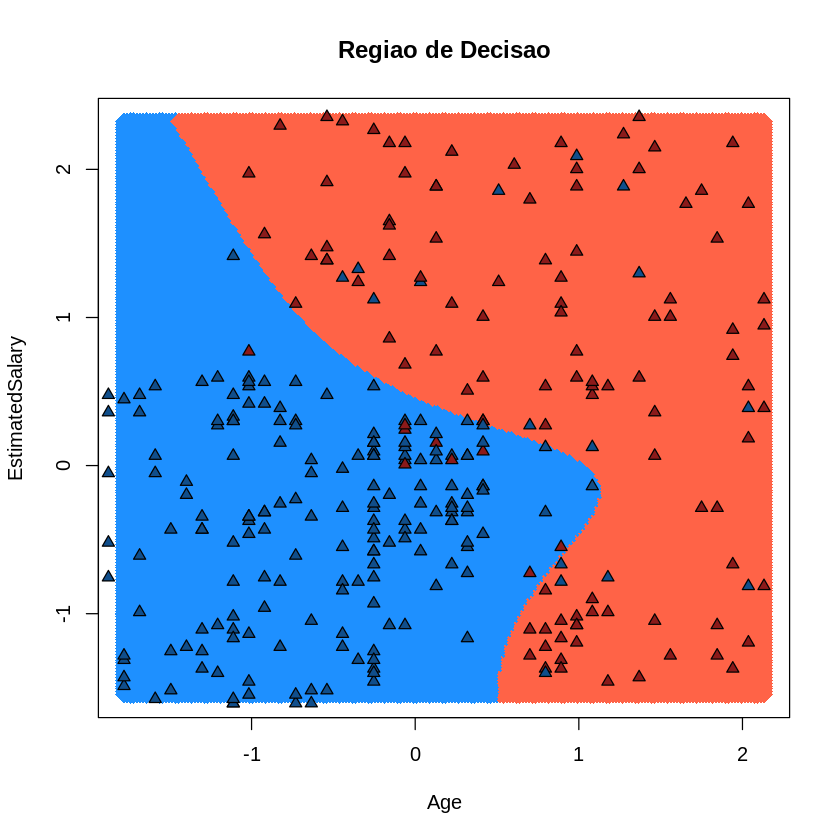

In [34]:
plot(teste0[, -3], main = 'Regiao de Decisao')
points(grid, pch = 18, col = ifelse(y_grid == 1, 'tomato', 'dodgerblue1'), cex= 2 )
points(treino0, pch = 24, bg = ifelse(treino0[, 3] == 1, 'firebrick4', 'dodgerblue4' ))